<a href="https://colab.research.google.com/github/aditik0919/Employee-Attrition-/blob/main/ML_Project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(data_path)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#checking data qaulity
for col in data.columns:
    print(f"{col} number of unique values: {data[col].nunique()}, data type = {data[col].dtype}")
    print("=="*20)
    print(data[col].unique())
    print("=="*30)

Age number of unique values: 43, data type = int64
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition number of unique values: 2, data type = object
['Yes' 'No']
BusinessTravel number of unique values: 3, data type = object
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate number of unique values: 886, data type = int64
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 11

There are some columns with only 1 unique value. Varience is low.
We will use varience threshold to 0 and check the columns
Data quality looks ok. No futher cleaning is required.
There are some numerical columns which are categorical in nature like JobLevel, RelationshipSatisfaction, PerformanceRating.
EmployeeNumber is an identification number. We will remove the same

In [ ]:
data.drop('EmployeeNumber',axis=1,inplace=True) #droping EmployeeNumber

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
 missing_values= data.isnull()
 print(missing_values)

        Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2              

No outliers detected in column Age.


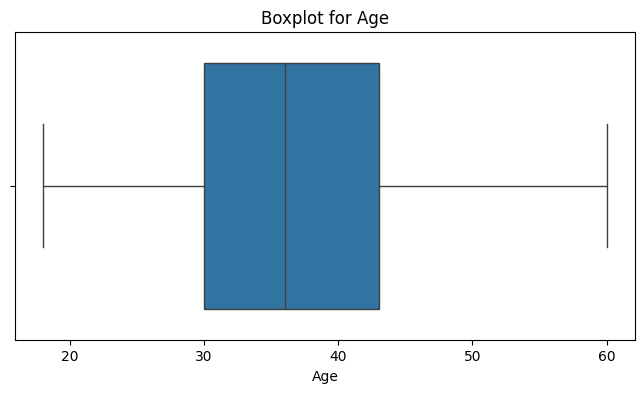

No outliers detected in column DailyRate.


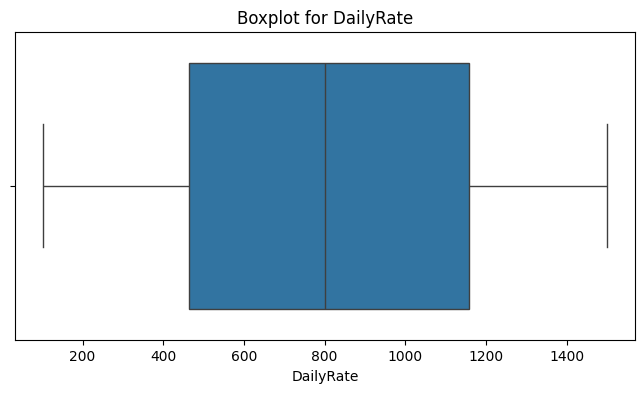

No outliers detected in column DistanceFromHome.


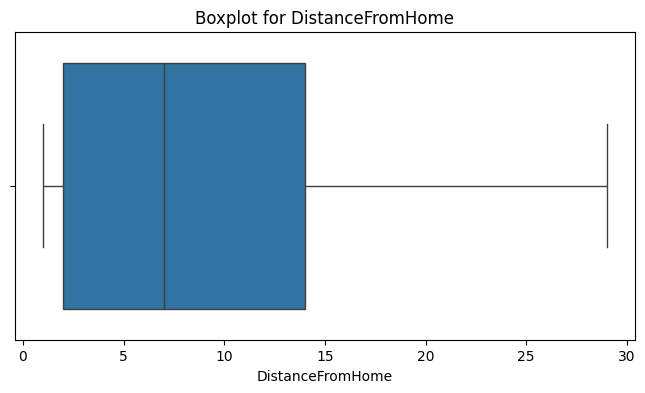

No outliers detected in column Education.


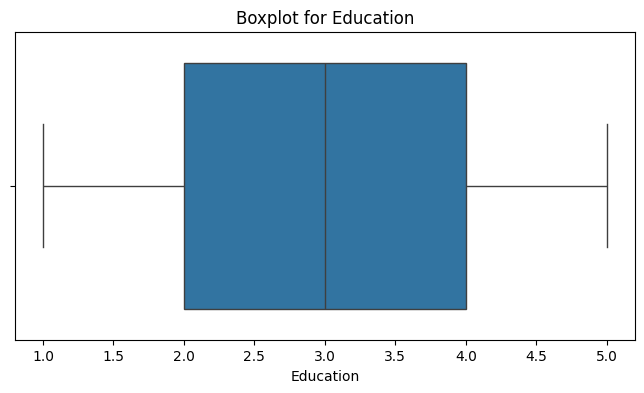

No outliers detected in column EmployeeCount.


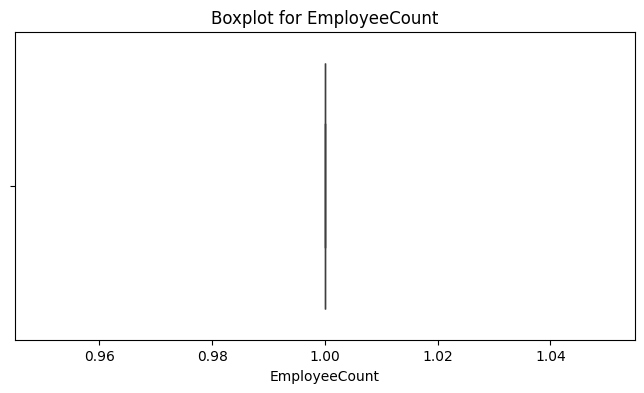

No outliers detected in column EnvironmentSatisfaction.


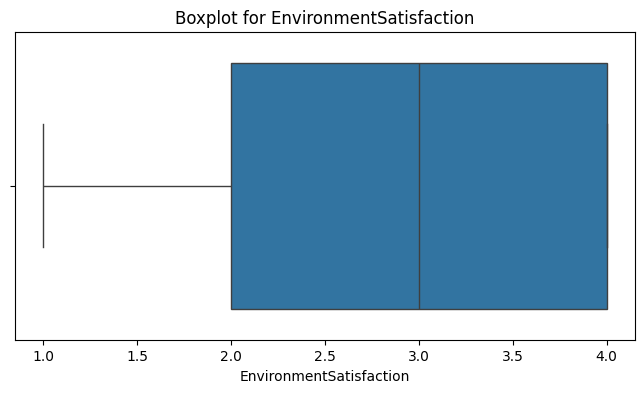

No outliers detected in column HourlyRate.


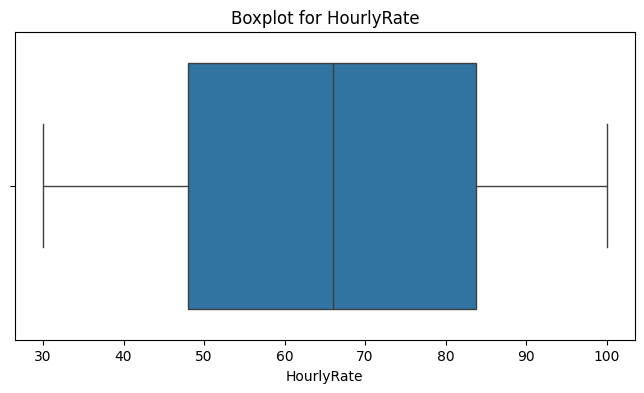

No outliers detected in column JobInvolvement.


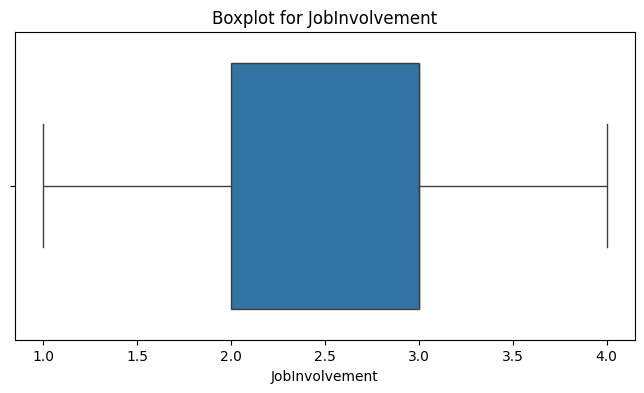

No outliers detected in column JobLevel.


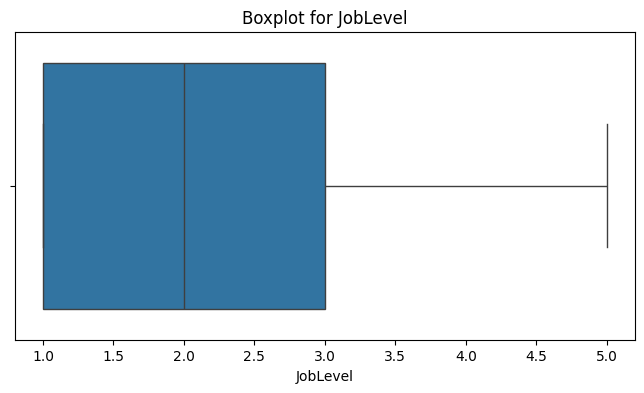

No outliers detected in column JobSatisfaction.


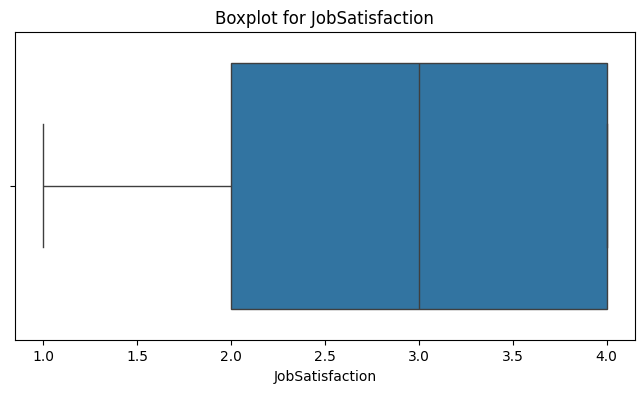

Outliers detected in column MonthlyIncome:
      MonthlyIncome
25            19094
29            18947
45            19545
62            18740
105           18844
...             ...
1374          17875
1377          19161
1401          19636
1437          19431
1443          18880

[114 rows x 1 columns]


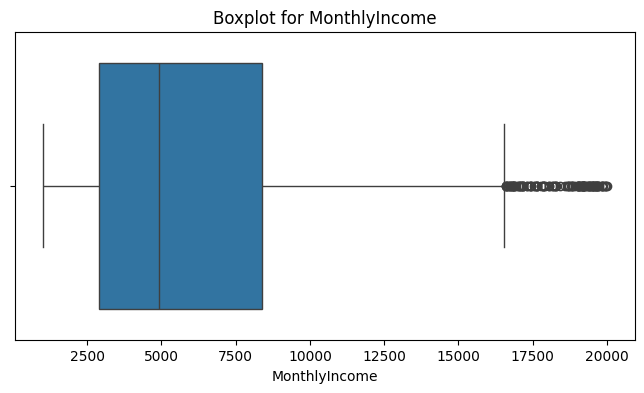

No outliers detected in column MonthlyRate.


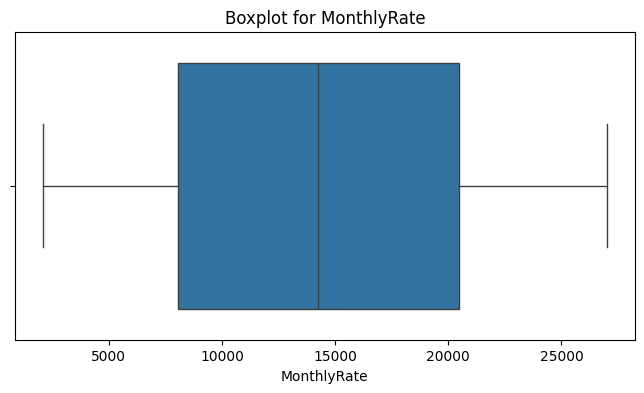

Outliers detected in column NumCompaniesWorked:
      NumCompaniesWorked
4                      9
38                     9
50                     9
95                     9
105                    9
122                    9
194                    9
198                    9
208                    9
245                    9
287                    9
290                    9
334                    9
371                    9
372                    9
385                    9
393                    9
401                    9
440                    9
447                    9
456                    9
525                    9
541                    9
544                    9
551                    9
575                    9
597                    9
617                    9
623                    9
660                    9
714                    9
717                    9
756                    9
770                    9
779                    9
789                    9
816                    9
83

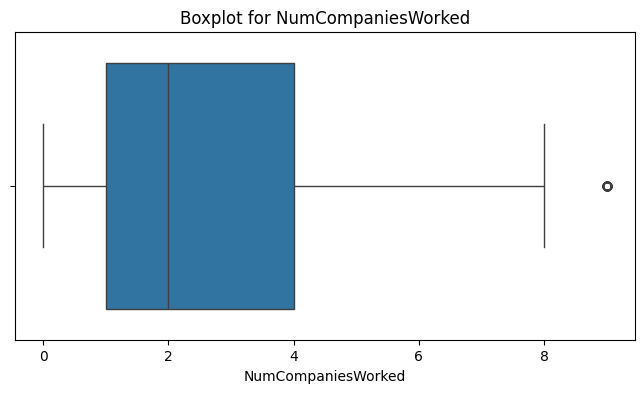

No outliers detected in column PercentSalaryHike.


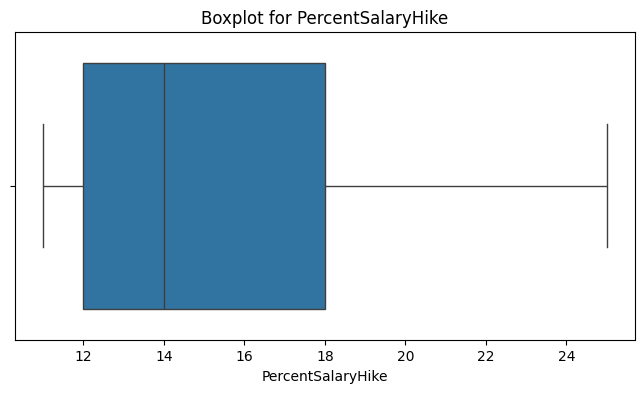

Outliers detected in column PerformanceRating:
      PerformanceRating
1                     4
6                     4
7                     4
8                     4
21                    4
...                 ...
1441                  4
1445                  4
1446                  4
1447                  4
1467                  4

[226 rows x 1 columns]


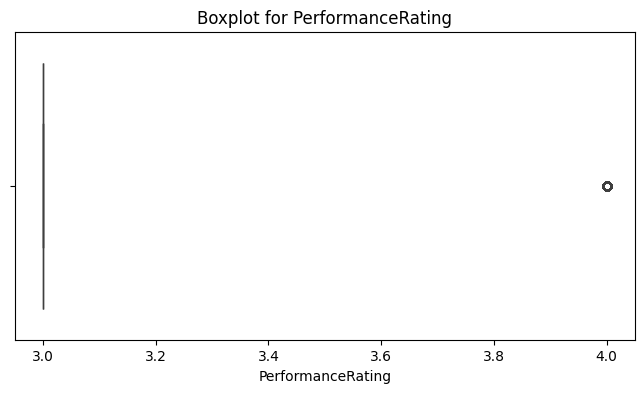

No outliers detected in column RelationshipSatisfaction.


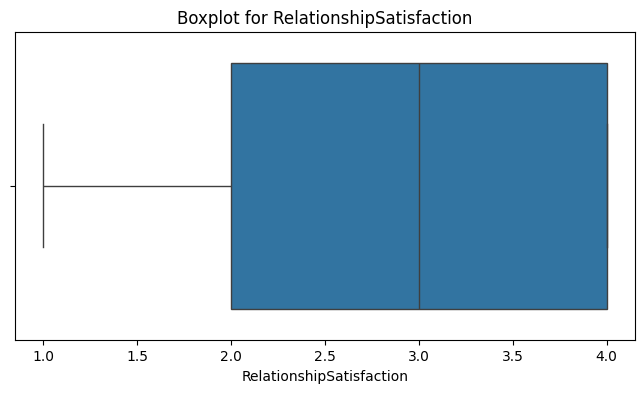

No outliers detected in column StandardHours.


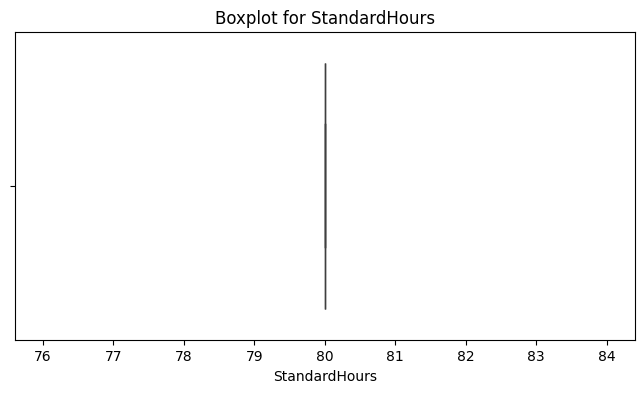

Outliers detected in column StockOptionLevel:
      StockOptionLevel
6                    3
64                   3
65                   3
83                   3
88                   3
...                ...
1402                 3
1415                 3
1440                 3
1442                 3
1457                 3

[85 rows x 1 columns]


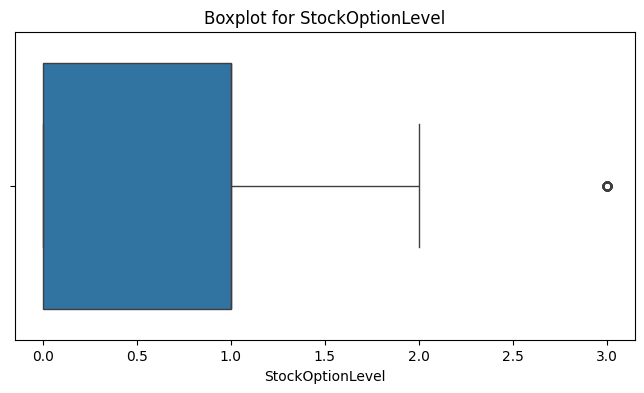

Outliers detected in column TotalWorkingYears:
      TotalWorkingYears
18                   31
62                   29
85                   37
98                   38
105                  30
...                 ...
1264                 34
1301                 37
1331                 29
1374                 29
1401                 35

[63 rows x 1 columns]


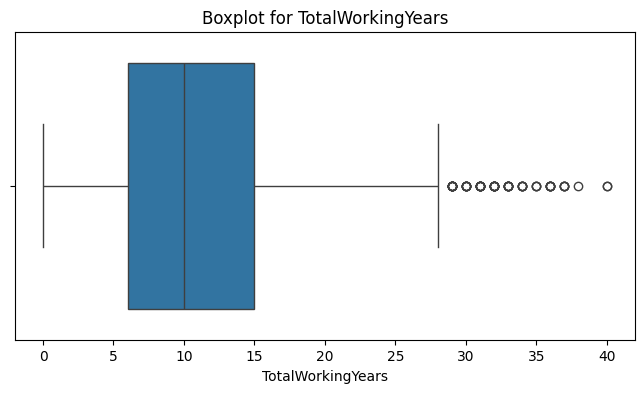

Outliers detected in column TrainingTimesLastYear:
      TrainingTimesLastYear
0                         0
10                        5
16                        5
20                        5
23                        6
...                     ...
1436                      6
1448                      5
1458                      5
1466                      5
1467                      0

[238 rows x 1 columns]


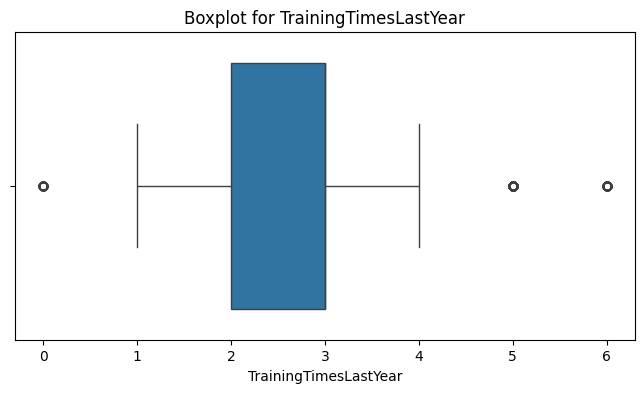

No outliers detected in column WorkLifeBalance.


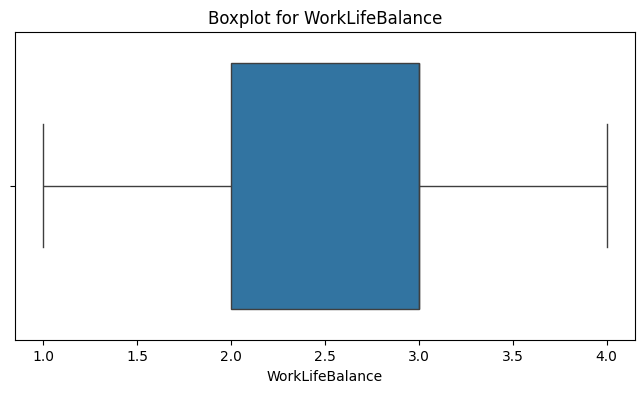

Outliers detected in column YearsAtCompany:
      YearsAtCompany
18                25
28                22
45                22
62                27
63                21
...              ...
1403              20
1404              20
1443              22
1445              20
1462              20

[104 rows x 1 columns]


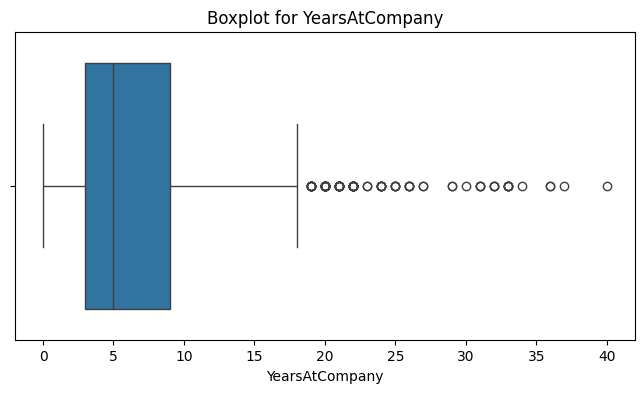

Outliers detected in column YearsInCurrentRole:
      YearsInCurrentRole
45                    15
63                    16
123                   18
187                   15
190                   18
231                   17
281                   16
417                   15
466                   16
595                   15
716                   16
746                   16
861                   15
976                   16
1024                  17
1150                  15
1156                  15
1221                  15
1327                  17
1351                  17
1430                  16


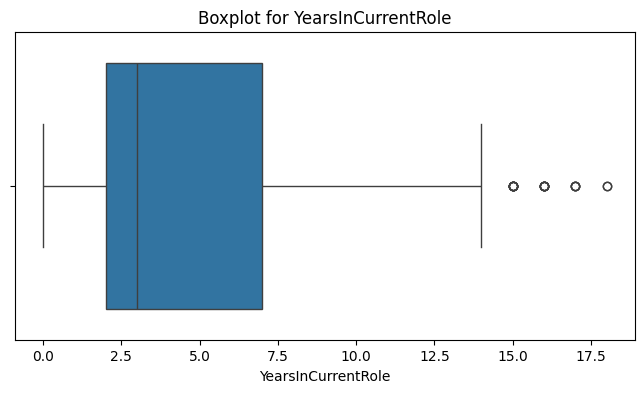

Outliers detected in column YearsSinceLastPromotion:
      YearsSinceLastPromotion
15                          8
45                         15
46                          8
55                          8
61                          9
...                       ...
1414                       12
1425                        8
1444                        9
1447                       11
1462                        9

[107 rows x 1 columns]


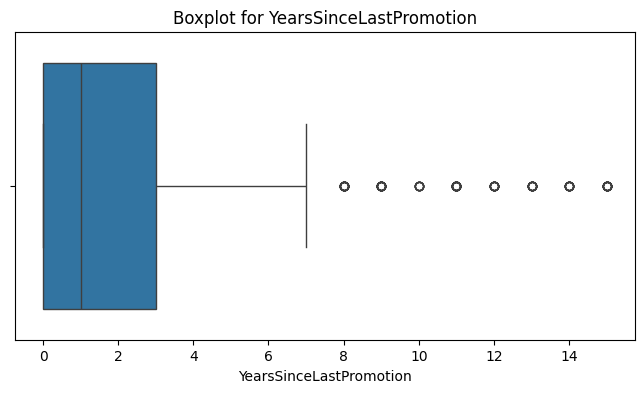

Outliers detected in column YearsWithCurrManager:
      YearsWithCurrManager
28                      17
123                     15
153                     15
187                     15
231                     15
386                     17
561                     16
616                     17
635                     15
686                     17
875                     17
926                     17
1078                    17
1348                    16


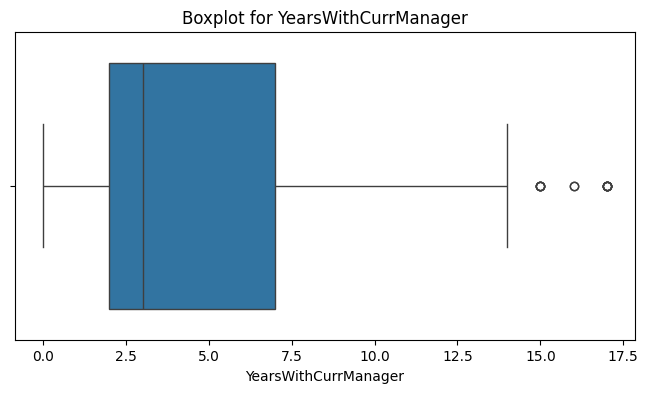

In [ ]:
import pandas as pd

# Load the dataset


# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers for each numerical column
for column in numerical_columns:
    outliers = detect_outliers(data, column)
    if not outliers.empty:
        print(f"Outliers detected in column {column}:")
        print(outliers[[column]])
    else:
        print(f"No outliers detected in column {column}.")
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

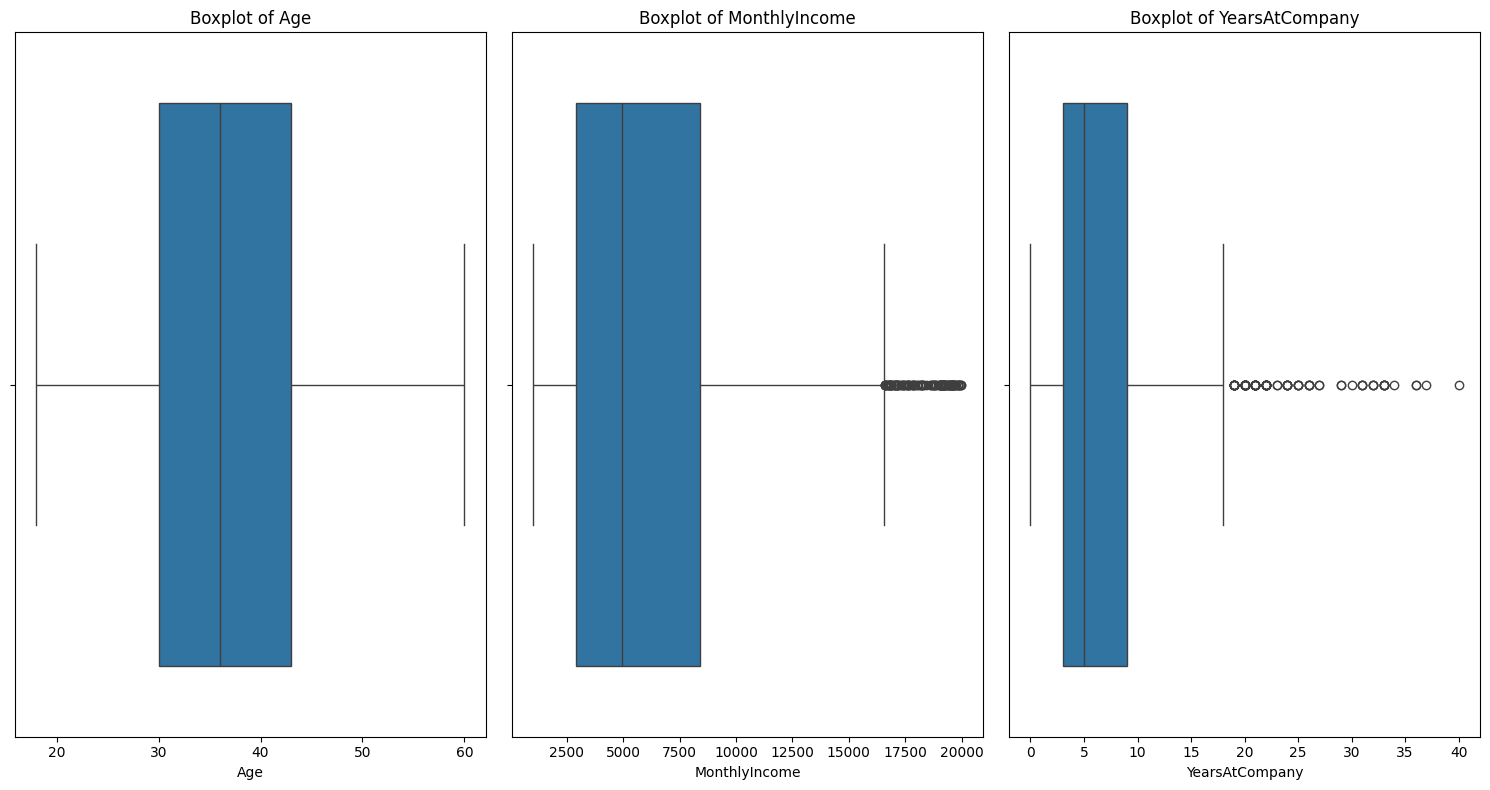

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset


# List of numerical columns
numerical_columns = ['Age', 'MonthlyIncome', 'YearsAtCompany']  # Add more columns as needed

# Create subplots
plt.figure(figsize=(15, 8))  # Set figure size

# Loop through numerical columns and create boxplots in subplots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)  # Create subplots with n columns
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
#dependent and independent segregation
X = data.drop('Attrition', axis=1)
Y = data['Attrition']

In [ ]:
#encoding dependent variable
Y = Y.map(lambda x: 1 if x == 'Yes' else 0)
X.columns = [col.replace(' ','_') for col in X.columns]

#encoding categorical columns
cat_col = [col for col in X.columns if data[col].dtype == np.object_]
X = pd.get_dummies(X, drop_first= True, columns= cat_col,dtype=int)

In [ ]:
Y.value_counts(normalize= True)

,proportion
Attrition,
0,0.838776
1,0.161224


Data is imbalance.

In [ ]:
print(f"Shape of X post Encoding: {X.shape[1]}")

Shape of X post Encoding: 46


In [ ]:
#checking zero variance columns
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0)
vt.fit(X)
zero_car_cals = X.columns[~vt.get_support()]
print(f"Columns with zero varience: {zero_car_cals}")

Columns with zero varience: Index(['EmployeeCount', 'StandardHours'], dtype='object')


In [ ]:
#removing the zero vaiance columns
X = X.drop(zero_car_cals,axis = 1)


In [ ]:
print(f"Shape of X post zero var column removal: {X.shape[1]}")

Shape of X post zero var column removal: 44


In [ ]:
#checking normalcy of the number variables¶
#checking the for threshold value to difircate the num_col and cat_col
dict_col ={col : X[col].nunique() for col in X.columns}
dict_col = dict(sorted(dict_col.items(), key=lambda x:x[1]))
dict_col

{'PerformanceRating': 2,
 'BusinessTravel_Travel_Frequently': 2,
 'BusinessTravel_Travel_Rarely': 2,
 'Department_Research & Development': 2,
 'Department_Sales': 2,
 'EducationField_Life Sciences': 2,
 'EducationField_Marketing': 2,
 'EducationField_Medical': 2,
 'EducationField_Other': 2,
 'EducationField_Technical Degree': 2,
 'Gender_Male': 2,
 'JobRole_Human Resources': 2,
 'JobRole_Laboratory Technician': 2,
 'JobRole_Manager': 2,
 'JobRole_Manufacturing Director': 2,
 'JobRole_Research Director': 2,
 'JobRole_Research Scientist': 2,
 'JobRole_Sales Executive': 2,
 'JobRole_Sales Representative': 2,
 'MaritalStatus_Married': 2,
 'MaritalStatus_Single': 2,
 'OverTime_Yes': 2,
 'EnvironmentSatisfaction': 4,
 'JobInvolvement': 4,
 'JobSatisfaction': 4,
 'RelationshipSatisfaction': 4,
 'StockOptionLevel': 4,
 'WorkLifeBalance': 4,
 'Education': 5,
 'JobLevel': 5,
 'TrainingTimesLastYear': 7,
 'NumCompaniesWorked': 10,
 'PercentSalaryHike': 15,
 'YearsSinceLastPromotion': 16,
 'YearsW

In [ ]:
#creating number columns and categorical columns
threshold = 5
num_col = [col for col in X.columns if X[col].nunique() >threshold]
cat_col = [col for col in X.columns if X[col].nunique() <=threshold]

In [ ]:
#kolmogorov-Smirnov Test

#H0 = data is normally distributed
#H1 = data is not normally distributed

alpha = 0.05
not_normal_col = {}
normal_col = {}
from scipy.stats import kstest
for col in num_col:
    result = kstest(X[col], 'norm')
    pvalue = result[1]
    if pvalue < alpha:
        not_normal_col[col] = pvalue
    else:
        normal_col[col] = pvalue

print("Normally distributed columns : ", normal_col.keys())
print("Not Noemally distributed columns : ", not_normal_col.keys())

Normally distributed columns :  dict_keys([])
Not Noemally distributed columns :  dict_keys(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])


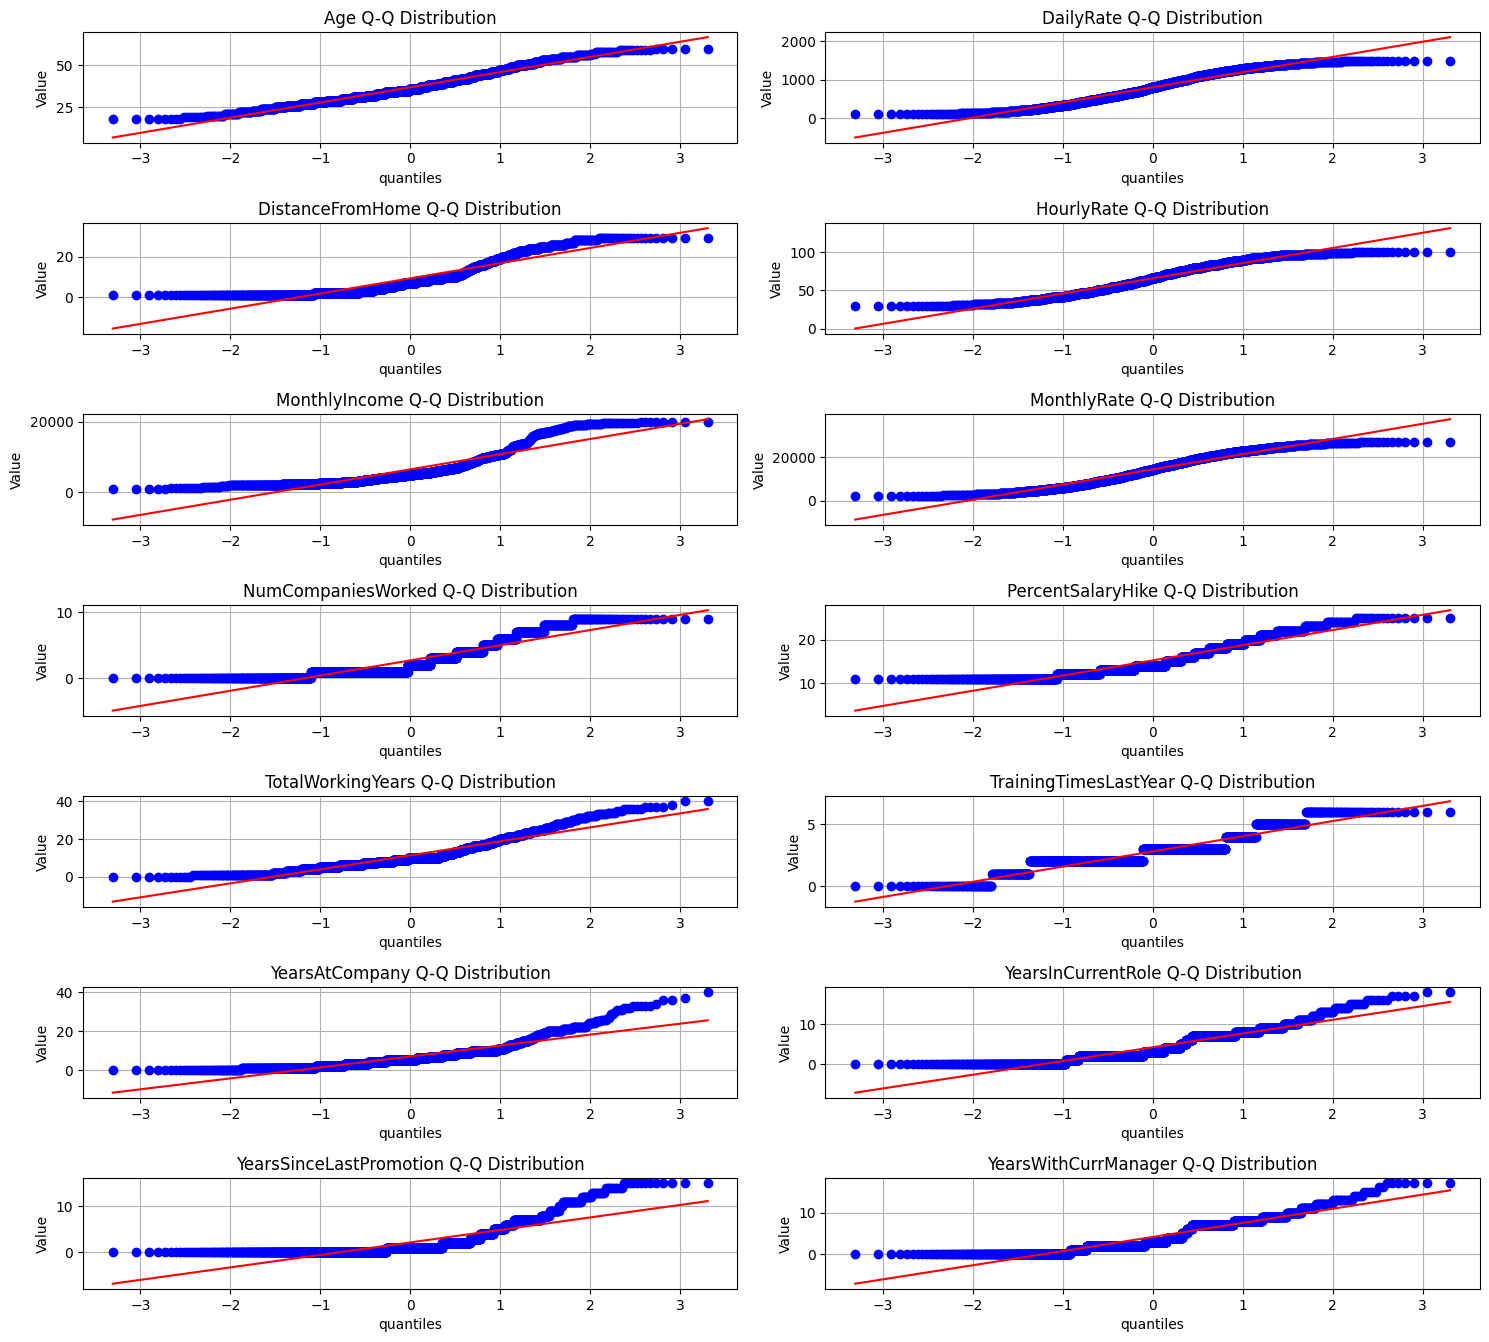

In [ ]:
# Q-Q plot
from scipy.stats import probplot
plt.figure(figsize=(15,15))
for i in range(len(num_col)):
    plt.subplot(len(num_col)//2+1,2,i+1)
    probplot(X[num_col[i]],dist='norm',plot= plt)
    plt.title(f"{num_col[i]} Q-Q Distribution")
    plt.ylabel('Value')
    plt.xlabel('quantiles')
    plt.grid(True)
plt.subplots_adjust(hspace=0.04, wspace=0.04)
plt.tight_layout()
plt.show()


In [ ]:
#Shapiro-Wilk Test

from scipy.stats import shapiro
#H0 = data is normally distributed
#H1 = data is not normally distributed

alpha = 0.05
not_normal_col = {}
normal_col = {}
from scipy.stats import kstest
for col in num_col:
    result = shapiro(X[col])
    pvalue = result[1]
    if pvalue < alpha:
        not_normal_col[col] = pvalue
    else:
        normal_col[col] = pvalue

print("Normally distributed columns : ", normal_col.keys())
print("Not Noemally distributed columns : ", not_normal_col.keys())

Normally distributed columns :  dict_keys([])
Not Noemally distributed columns :  dict_keys(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])


Basis above tests we can conclude that no columns are following normal distributions.
We will use Tree based Algorithms for model buiding.

In [ ]:
#Multicollinearity Check
#We will check the multocollinearity using following

#VIF Method
#Corelation Matirx
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_new = sm.add_constant(X)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i)
                          for i in range(len(X_new.columns))]
vif_data = vif_data.loc[1:,:] #removing the constant column from the dataframe
#checking the data where VIF is more than 5
vif_data[vif_data['VIF'] >5.]



,feature,VIF
8,JobLevel,14.140113
10,MonthlyIncome,18.122028
17,TotalWorkingYears,5.012645
26,Department_Research & Development,44.048344
27,Department_Sales,43.955448
28,EducationField_Life Sciences,24.117380
29,EducationField_Marketing,10.895860
30,EducationField_Medical,21.670489
31,EducationField_Other,6.044535
32,EducationField_Technical Degree,8.873852


Following column showing multi colinearity in the data.
JobLevel, MonthlyIncome, TotalWorkingYears, Department_Research & Development, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree, JobRole_Human Resources, JobRole_Sales Executive, JobRole_Sales Representative
However it does not convey with which feature multi colinearity is noted.

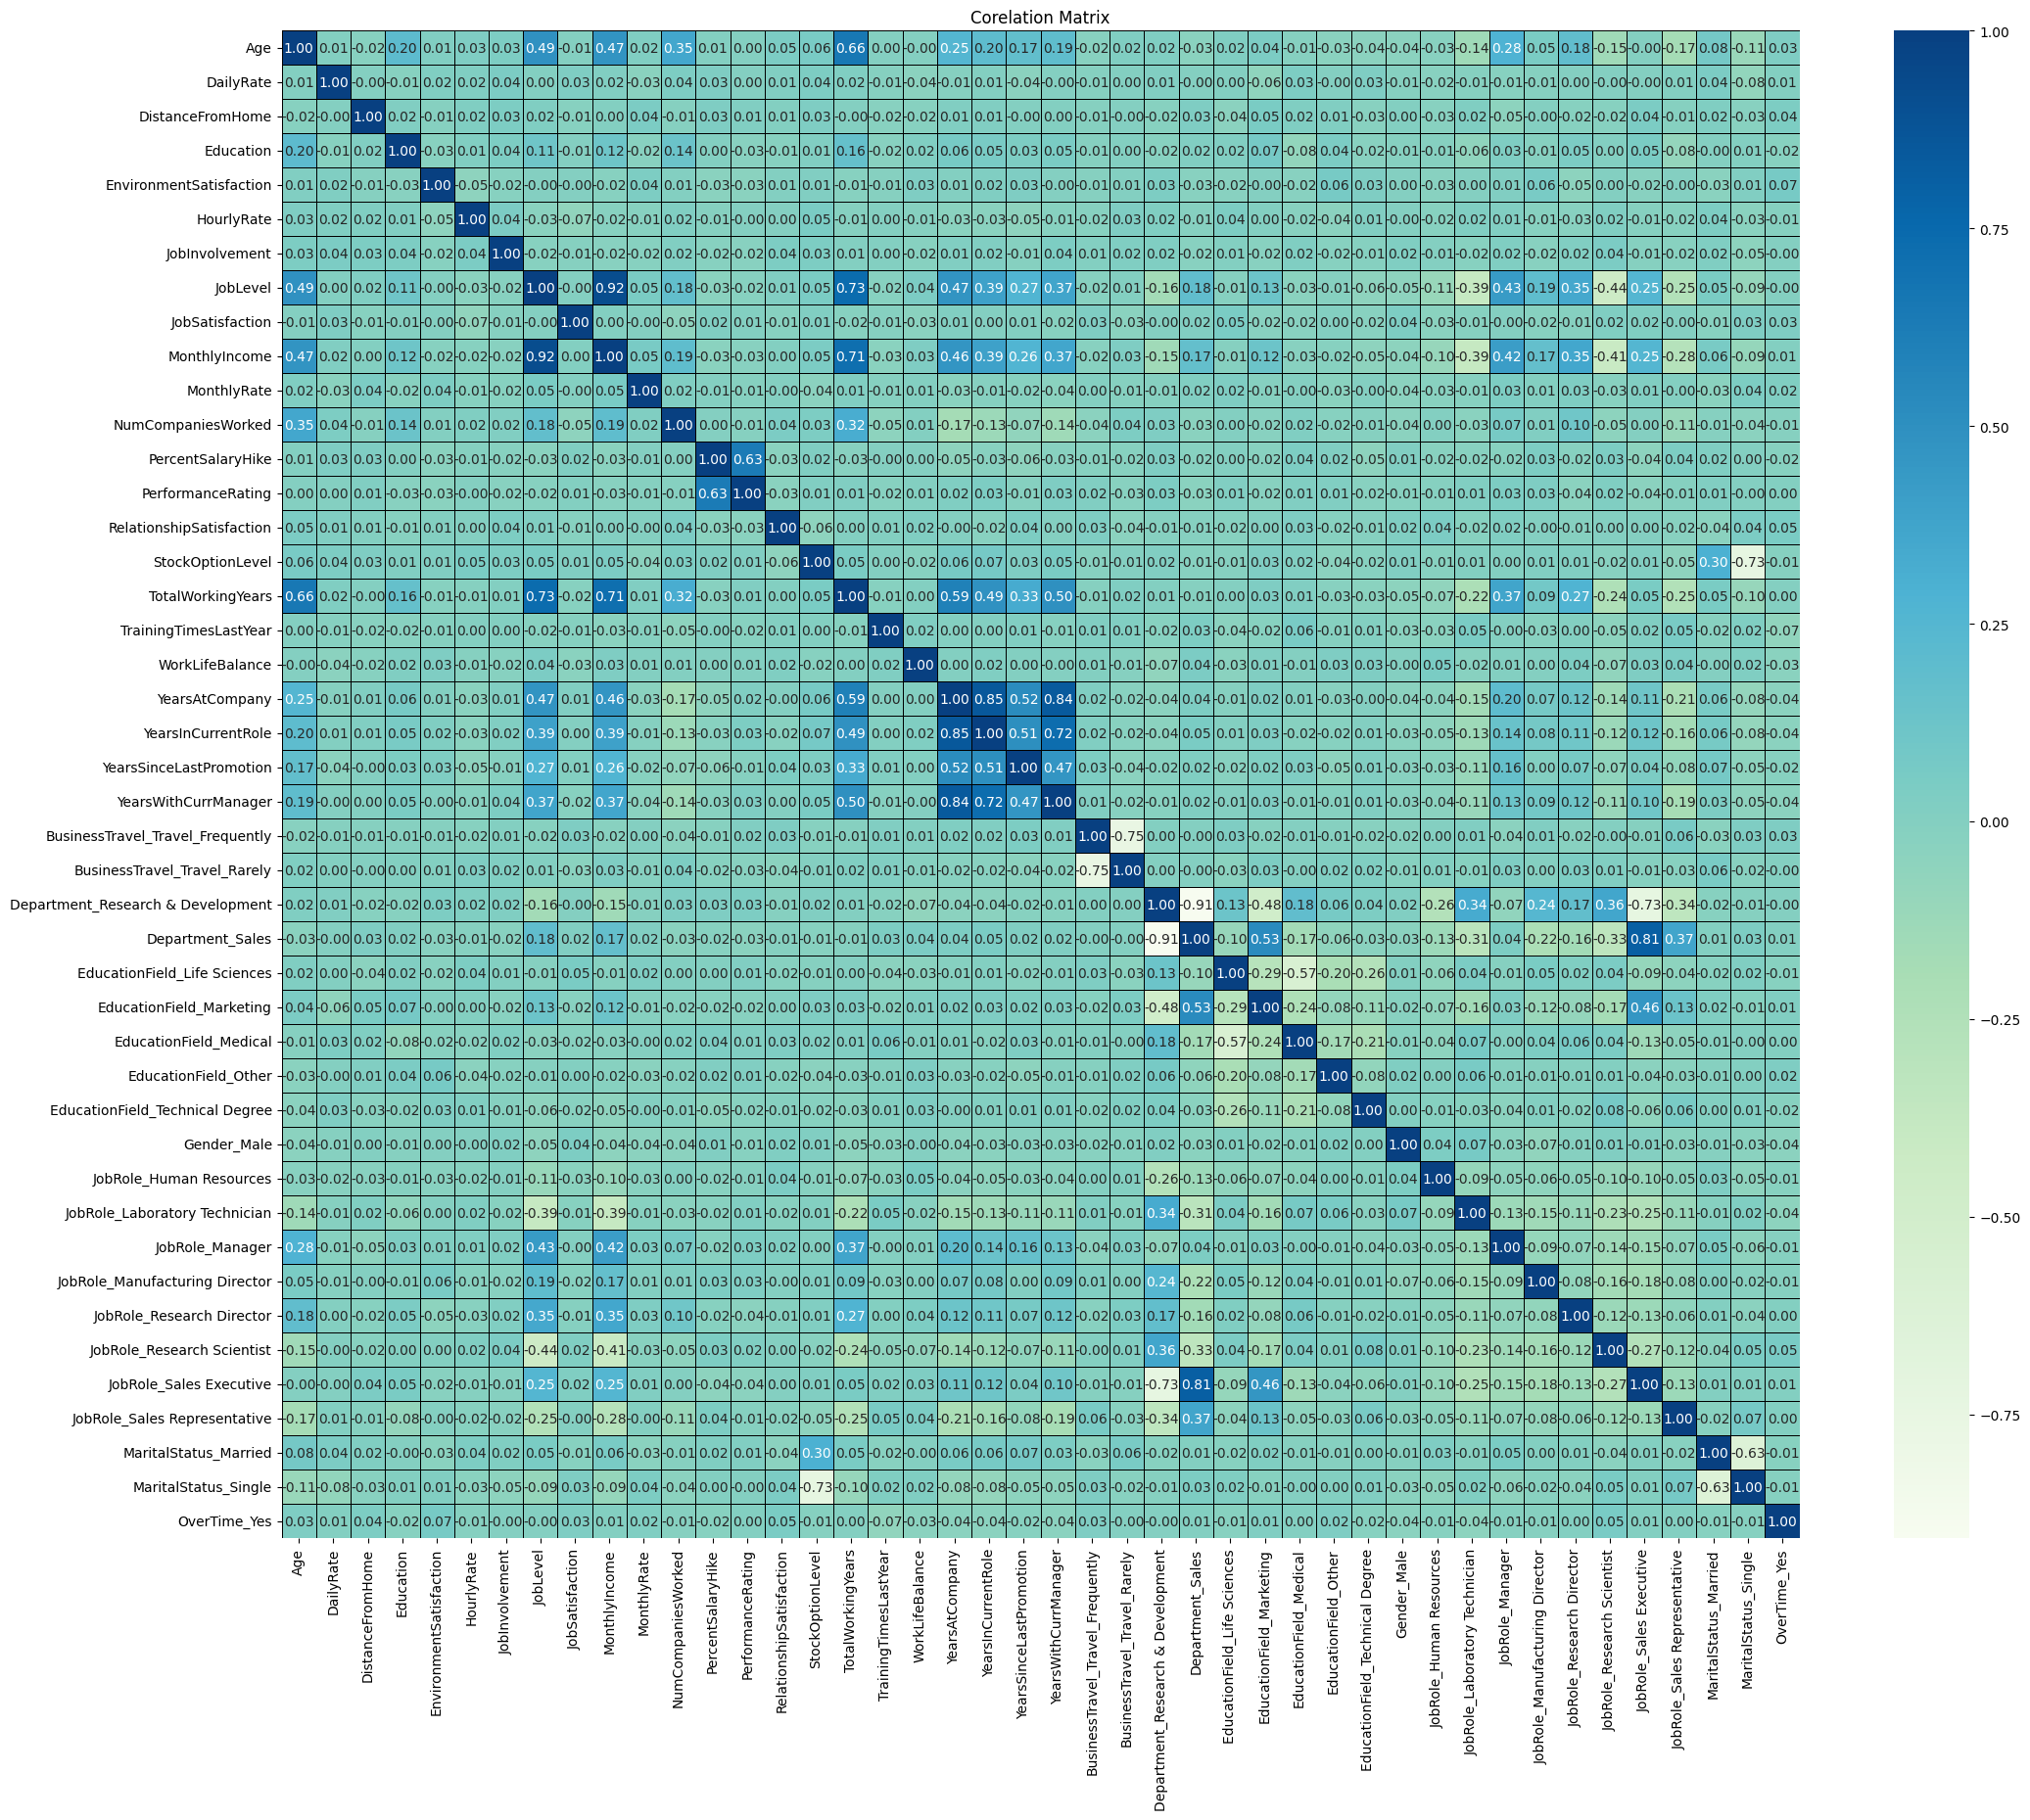

In [ ]:
#correlation matrix
cor_mat = X.corr(method='spearman') # as we do not know the distribution of variable.
plt.figure(figsize=(25,20))
sns.heatmap(cor_mat,annot= True, fmt = '.2f', cmap='GnBu', linecolor='black', linewidths=0.5)
plt.title("Corelation Matrix")
plt.show()

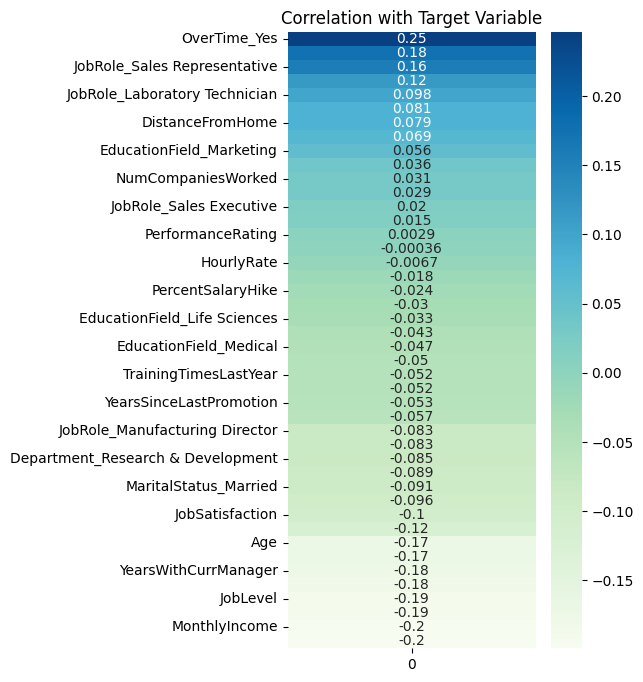

In [ ]:
# Create a correlation matrix with target variable
corr_with_target = X.corrwith(Y, method='spearman') #chosing spearman as there is no normal variable.

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()


Monthly income is highly coreleated with JobLevel
YearsInCompany is highly coreleated with YearsAtCurrentRole.
YearsWithCurrManager is highly coreleated with YearsAtCompany.
Department_Sales is highly coreleated with JobRole_Sales Executive.
Department_Sales negative corelated with Department_Research & Development.
Coreleation with target shows that there are very little contribution to the target for various features.

Some of the columns are matching with vif data. We will check for other methods and feature importance and decide on feature reduction.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, f1_score, confusion_matrix,accuracy_score

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42, train_size=0.8, stratify= Y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)

models = [dt,rf,ada,gb,xgb,lgb]

In [ ]:
class ModelBuilding:
    def __init__(self, x_train, x_test, y_train, y_test, models, smote=False) -> None:
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = models
        self.smote = smote

    def dataBalaencing(self):
        if self.smote:
            sm = SMOTE()
            self.x_train, self.y_train = sm.fit_resample(self.x_train, self.y_train, sampling_strategy = 'minority')


    def fitModel(self):
        trained_models = []
        metrics = pd.DataFrame(columns=['train_accuracy', 'test_accuracy', 'train_f1', 'test_f1'])
        for model in self.models:
            model.fit(self.x_train, self.y_train)
            y_train_pred = model.predict(self.x_train)
            y_test_pred = model.predict(self.x_test)
            train_accuracy = accuracy_score(self.y_train, y_train_pred)
            test_accuracy = accuracy_score(self.y_test, y_test_pred)
            train_f1 = f1_score(self.y_train, y_train_pred)
            test_f1 = f1_score(self.y_test, y_test_pred)
            metrics.loc[len(metrics)] = [train_accuracy, test_accuracy, train_f1, test_f1]
            trained_models.append(model)
        metrics.index = [model.__class__.__name__ for model in self.models]
        return trained_models, metrics

    def report(self,trained_models):
        for model in trained_models:
            y_pred = model.predict(self.x_test)
            print(f"{model.__class__.__name__} classification report")
            print(classification_report(self.y_test, y_pred))
            print("=="*30)
            plt.figure(figsize=(8,8))
            sns.heatmap(confusion_matrix(self.y_test, y_pred),
                        annot= True, fmt= '.0f',
                        cmap='GnBu', linecolor='black', linewidths= '0.5')
            plt.title(f"{model.__class__.__name__}")
        plt.show()
model_building = ModelBuilding(X_train, X_test, y_train, y_test,models,smote=False)
trained_models, metrics = model_building.fitModel()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1177
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632


In [ ]:
metrics

,train_accuracy,test_accuracy,train_f1,test_f1
DecisionTreeClassifier,1.000000,0.768707,1.000000,0.333333
RandomForestClassifier,1.000000,0.833333,1.000000,0.140351
AdaBoostClassifier,0.908163,0.850340,0.647059,0.333333
GradientBoostingClassifier,0.956633,0.846939,0.844985,0.262295
XGBClassifier,1.000000,0.833333,1.000000,0.395062
LGBMClassifier,1.000000,0.874150,1.000000,0.430769


DecisionTreeClassifier classification report
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       247
           1       0.31      0.36      0.33        47

    accuracy                           0.77       294
   macro avg       0.59      0.60      0.60       294
weighted avg       0.78      0.77      0.78       294

RandomForestClassifier classification report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294

AdaBoostClassifier classification report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.58      0.23      0.33        47

    accuracy                           0.85       2

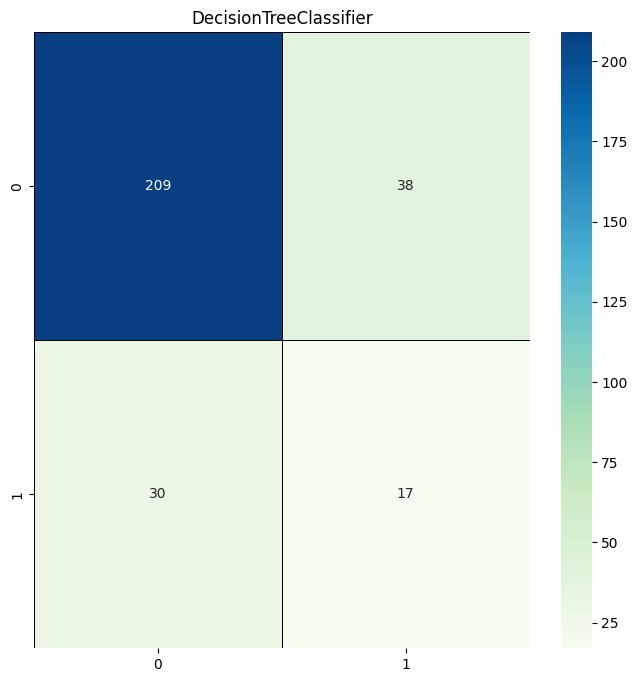

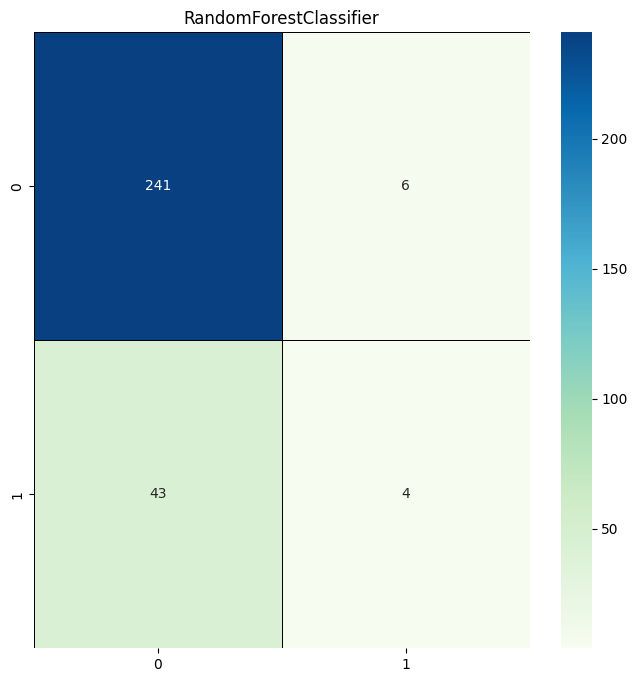

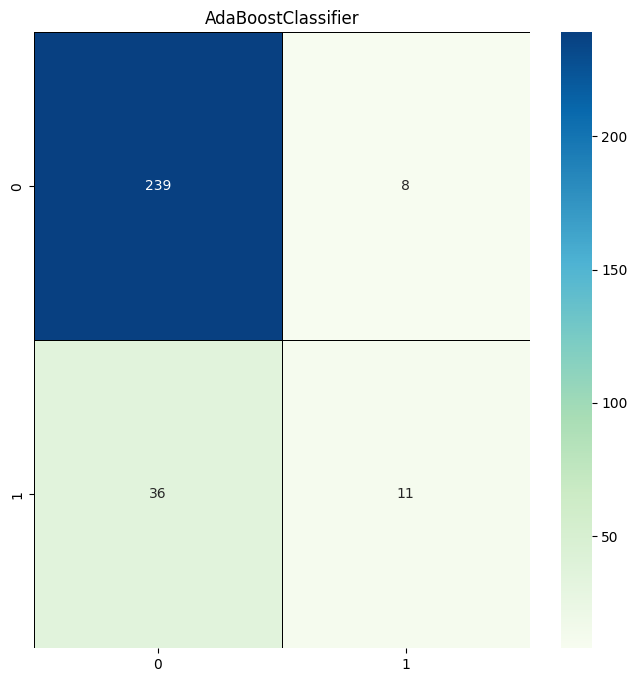

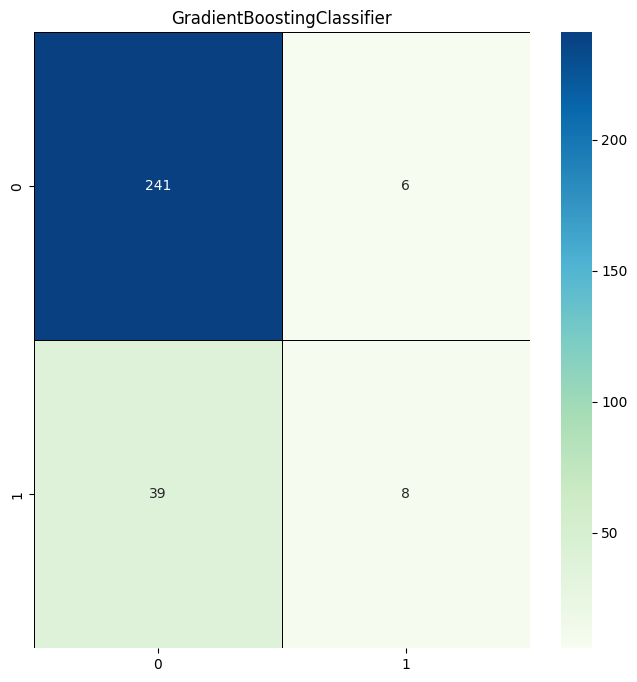

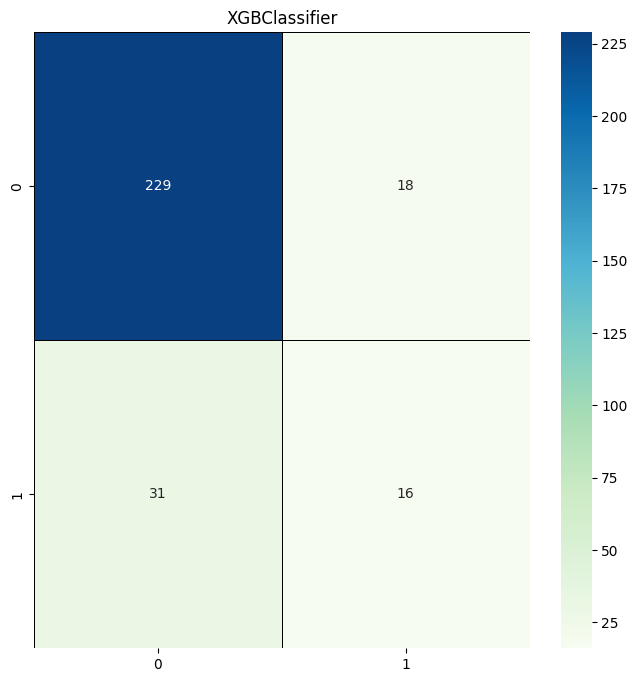

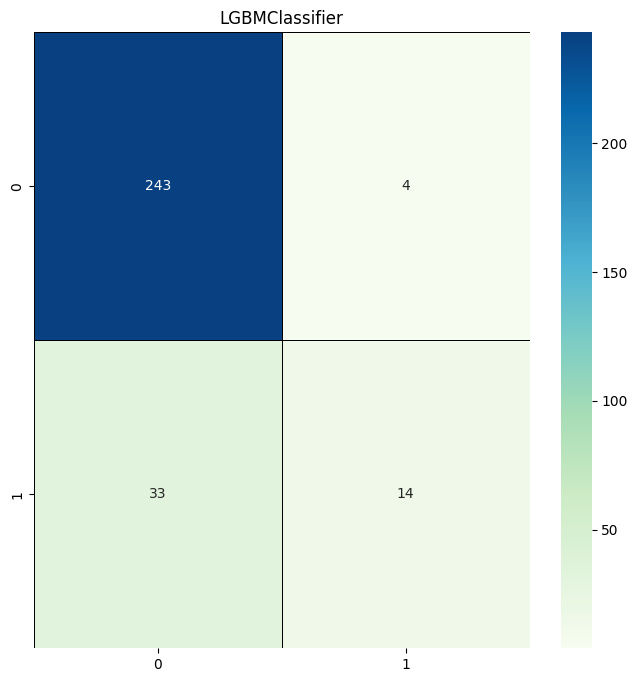

In [ ]:
model_building.report(trained_models)

Text(0, 0.5, 'explained variance ratio or Amount of Info')

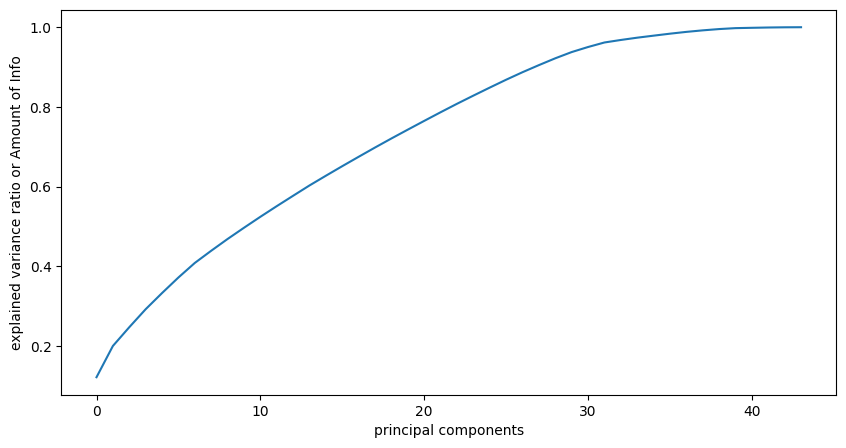

In [ ]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit(X_scaled)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(X_pca.explained_variance_ratio_))

plt.xlabel("principal components")
plt.ylabel("explained variance ratio or Amount of Info")